In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("./laptop_dataset/laptops.csv")

In [102]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [154]:
df['CPU'].unique()

array(['Intel Core i7', 'AMD Ryzen 7', 'Intel Core i5', 'AMD Ryzen 9',
       'Intel Core i9', 'AMD Ryzen 5', 'Intel Evo Core i7',
       'Intel Evo Core i9', 'AMD Radeon 9', 'AMD Ryzen 3'], dtype=object)

In [103]:
len(df['CPU'].unique())

28

In [104]:
all_columns = df.columns

In [105]:
all_columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [106]:
for column in all_columns:
    print(f"Column:{column}")
    print(df[column].unique())
    print(f'Unique values: {len(df[column].unique())}\n')

Column:Laptop
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 ...
 'Razer Blade 17 FHD 360Hz Intel Core i7-11800H/32GB/1TB SSD/RTX 3080/17.3"'
 'Razer Book 13 Intel Evo Core i7-1165G7/16GB/1TB SSD/13.4" Táctil'
 'Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/256GB SSD/13.4" Táctil']
Unique values: 2160

Column:Status
['New' 'Refurbished']
Unique values: 2

Column:Brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo' 'Medion' 'Acer' 'Apple' 'Razer'
 'Gigabyte' 'Dell' 'LG' 'Samsung' 'PcCom' 'Microsoft' 'Primux' 'Prixton'
 'Dynabook Toshiba' 'Thomson' 'Denver' 'Deep Gaming' 'Vant' 'Innjoo'
 'Jetwing' 'Millenium' 'Realme' 'Toshiba']
Unique values: 27

Column:Model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair' 'ThinkPad' 'VivoBook'
 'Akoya' 'Victus' 'V15' 'Thin' 'ROG' 'IdeaPad' 'Cyborg' 'M515UA' 'TUF'
 'Aspire' 'Pavilion' 'Vector' 'Ch

In [107]:
all_columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [108]:
# Drop rows with NaN values in the 'Storage type' and 'Screen' columns
df.dropna(subset=['Storage type', 'Screen', "GPU"], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# replacement_values = {
#     'GPU': 'no GPU'
# }

# df['GPU'].fillna(replacement_values['GPU'], inplace=True)
print(df.head())


                                              Laptop Status Brand      Model  \
0  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New   MSI     Katana   
1  MSI Crosshair 17 C12VF-264XES Intel Core i7-12...    New   MSI  Crosshair   
2  HP Victus 16-d1038ns Intel Core i7-12700H/16GB...    New    HP     Victus   
3  MSI Thin GF63 12VE-021XES Intel Core i7-12650H...    New   MSI       Thin   
4  ASUS ROG Strix G15 G513RC-HN088 AMD Ryzen 7 68...    New  Asus        ROG   

             CPU  RAM  Storage Storage type       GPU  Screen Touch  \
0  Intel Core i7   16     1000          SSD  RTX 3050    15.6    No   
1  Intel Core i7   32     1000          SSD  RTX 4060    17.3    No   
2  Intel Core i7   16      512          SSD  RTX 3050    16.1    No   
3  Intel Core i7   16     1000          SSD  RTX 4050    15.6    No   
4    AMD Ryzen 7   16      512          SSD  RTX 3050    15.6    No   

   Final Price  
0       1199.0  
1       1699.0  
2       1149.0  
3       1399.0  
4      

In [109]:
nan_check = df.isna()
print(nan_check)

     Laptop  Status  Brand  Model    CPU    RAM  Storage  Storage type    GPU  \
0     False   False  False  False  False  False    False         False  False   
1     False   False  False  False  False  False    False         False  False   
2     False   False  False  False  False  False    False         False  False   
3     False   False  False  False  False  False    False         False  False   
4     False   False  False  False  False  False    False         False  False   
..      ...     ...    ...    ...    ...    ...      ...           ...    ...   
776   False   False  False  False  False  False    False         False  False   
777   False   False  False  False  False  False    False         False  False   
778   False   False  False  False  False  False    False         False  False   
779   False   False  False  False  False  False    False         False  False   
780   False   False  False  False  False  False    False         False  False   

     Screen  Touch  Final P

In [110]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [111]:
df = df.drop(['Laptop', 'Model'], axis=1)

In [112]:
string_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()

# df_normalized = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df_normalized = df.select_dtypes(include=['int', 'float'])
df_encoded = pd.get_dummies(df, columns=string_columns)
df_encoded = df_encoded.drop(df_encoded.columns[:4], axis=1)

df_encoded_normalized = pd.concat([df_encoded, df_normalized], axis=1)

print(df_encoded_normalized.head())

   Status_New  Status_Refurbished  Brand_Acer  Brand_Apple  Brand_Asus  \
0           1                   0           0            0           0   
1           1                   0           0            0           0   
2           1                   0           0            0           0   
3           1                   0           0            0           0   
4           1                   0           0            0           1   

   Brand_Deep Gaming  Brand_Dell  Brand_Gigabyte  Brand_HP  Brand_LG  ...  \
0                  0           0               0         0         0  ...   
1                  0           0               0         0         0  ...   
2                  0           0               0         1         0  ...   
3                  0           0               0         0         0  ...   
4                  0           0               0         0         0  ...   

   GPU_T 2000  GPU_T 500  GPU_T 550  GPU_T 600  Touch_No  Touch_Yes  RAM  \
0           0   

In [113]:
numerical_columns

Index(['RAM', 'Storage', 'Screen', 'Final Price'], dtype='object')

In [114]:
df_normalized

,RAM,Storage,Screen,Final Price
0,16,1000,15.6,1199.00
1,32,1000,17.3,1699.00
2,16,512,16.1,1149.00
3,16,1000,15.6,1399.00
4,16,512,15.6,1199.00
...,...,...,...,...
776,16,512,15.6,1583.39
777,32,1000,17.3,4699.99
778,16,1000,17.3,2699.99
779,16,1000,17.3,2899.99


In [115]:

# # Apply inverse transformation to the selected columns
# df_inverse_transformed = df_normalized.copy()  # Create a copy of the scaled DataFrame

# df_inverse_transformed = scaler.inverse_transform(df_normalized)

# # Print the inverse-transformed DataFrame
# print(df_inverse_transformed)


In [116]:
df_encoded.columns

Index(['Status_New', 'Status_Refurbished', 'Brand_Acer', 'Brand_Apple',
       'Brand_Asus', 'Brand_Deep Gaming', 'Brand_Dell', 'Brand_Gigabyte',
       'Brand_HP', 'Brand_LG', 'Brand_Lenovo', 'Brand_MSI', 'Brand_Medion',
       'Brand_Microsoft', 'Brand_Millenium', 'Brand_PcCom', 'Brand_Razer',
       'Brand_Samsung', 'CPU_AMD Radeon 9', 'CPU_AMD Ryzen 3',
       'CPU_AMD Ryzen 5', 'CPU_AMD Ryzen 7', 'CPU_AMD Ryzen 9',
       'CPU_Intel Core i5', 'CPU_Intel Core i7', 'CPU_Intel Core i9',
       'CPU_Intel Evo Core i7', 'CPU_Intel Evo Core i9', 'Storage type_SSD',
       'GPU_610 M', 'GPU_A 370M', 'GPU_A 730M', 'GPU_GTX 1050', 'GPU_GTX 1070',
       'GPU_GTX 1650', 'GPU_GTX 1660', 'GPU_MX 130', 'GPU_MX 330',
       'GPU_MX 450', 'GPU_MX 550', 'GPU_P 500', 'GPU_RTX 2050', 'GPU_RTX 2060',
       'GPU_RTX 2070', 'GPU_RTX 2080', 'GPU_RTX 3000', 'GPU_RTX 3050',
       'GPU_RTX 3060', 'GPU_RTX 3070', 'GPU_RTX 3080', 'GPU_RTX 4050',
       'GPU_RTX 4060', 'GPU_RTX 4070', 'GPU_RTX 4080', 'GPU_

In [117]:
# column_mapping = {}

# for item in ['Status_New', 'Status_Refurbished', 'Brand_Acer', 'Brand_Apple',
#        'Brand_Asus', 'Brand_Deep Gaming', 'Brand_Dell', 'Brand_Gigabyte',
#        'Brand_HP', 'Brand_LG', 'Brand_Lenovo', 'Brand_MSI', 'Brand_Medion',
#        'Brand_Microsoft', 'Brand_Millenium', 'Brand_PcCom', 'Brand_Razer',
#        'Brand_Samsung', 'CPU_AMD Radeon 9', 'CPU_AMD Ryzen 3',
#        'CPU_AMD Ryzen 5', 'CPU_AMD Ryzen 7', 'CPU_AMD Ryzen 9',
#        'CPU_Intel Core i5', 'CPU_Intel Core i7', 'CPU_Intel Core i9',
#        'CPU_Intel Evo Core i7', 'CPU_Intel Evo Core i9', 'Storage type_SSD',
#        'GPU_610 M', 'GPU_A 370M', 'GPU_A 730M', 'GPU_GTX 1050', 'GPU_GTX 1070',
#        'GPU_GTX 1650', 'GPU_GTX 1660', 'GPU_MX 130', 'GPU_MX 330',
#        'GPU_MX 450', 'GPU_MX 550', 'GPU_P 500', 'GPU_RTX 2050', 'GPU_RTX 2060',
#        'GPU_RTX 2070', 'GPU_RTX 2080', 'GPU_RTX 3000', 'GPU_RTX 3050',
#        'GPU_RTX 3060', 'GPU_RTX 3070', 'GPU_RTX 3080', 'GPU_RTX 4050',
#        'GPU_RTX 4060', 'GPU_RTX 4070', 'GPU_RTX 4080', 'GPU_RTX 4090',
#        'GPU_RTX A1000', 'GPU_RTX A2000', 'GPU_RTX A3000', 'GPU_RTX A5500',
#        'GPU_RX 6500M', 'GPU_RX 6700M', 'GPU_RX 6800S', 'GPU_RX 7600S',
#        'GPU_Radeon Pro 5300M', 'GPU_Radeon Pro 5500M',
#        'GPU_Radeon Pro RX 560X', 'GPU_Radeon RX 6600M', 'GPU_T 1000',
#        'GPU_T 1200', 'GPU_T 2000', 'GPU_T 500', 'GPU_T 550', 'GPU_T 600',
#        'Touch_No', 'Touch_Yes']:
#     key, value = item.split('_')
#     column_mapping[item] = value

# print(column_mapping)


{'Status_New': 'New', 'Status_Refurbished': 'Refurbished', 'Brand_Acer': 'Acer', 'Brand_Apple': 'Apple', 'Brand_Asus': 'Asus', 'Brand_Deep Gaming': 'Deep Gaming', 'Brand_Dell': 'Dell', 'Brand_Gigabyte': 'Gigabyte', 'Brand_HP': 'HP', 'Brand_LG': 'LG', 'Brand_Lenovo': 'Lenovo', 'Brand_MSI': 'MSI', 'Brand_Medion': 'Medion', 'Brand_Microsoft': 'Microsoft', 'Brand_Millenium': 'Millenium', 'Brand_PcCom': 'PcCom', 'Brand_Razer': 'Razer', 'Brand_Samsung': 'Samsung', 'CPU_AMD Radeon 9': 'AMD Radeon 9', 'CPU_AMD Ryzen 3': 'AMD Ryzen 3', 'CPU_AMD Ryzen 5': 'AMD Ryzen 5', 'CPU_AMD Ryzen 7': 'AMD Ryzen 7', 'CPU_AMD Ryzen 9': 'AMD Ryzen 9', 'CPU_Intel Core i5': 'Intel Core i5', 'CPU_Intel Core i7': 'Intel Core i7', 'CPU_Intel Core i9': 'Intel Core i9', 'CPU_Intel Evo Core i7': 'Intel Evo Core i7', 'CPU_Intel Evo Core i9': 'Intel Evo Core i9', 'Storage type_SSD': 'SSD', 'GPU_610 M': '610 M', 'GPU_A 370M': 'A 370M', 'GPU_A 730M': 'A 730M', 'GPU_GTX 1050': 'GTX 1050', 'GPU_GTX 1070': 'GTX 1070', 'GPU_G

In [118]:
df.dtypes

Status           object
Brand            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [119]:
# import pandas as pd

# # Define a dictionary to map the encoded column names to their original values
# column_mapping = {'Status_New': 'New', 'Status_Refurbished': 'Refurbished', 'Brand_Acer': 'Acer', 'Brand_Apple': 'Apple', 'Brand_Asus': 'Asus', 'Brand_Deep Gaming': 'Deep Gaming', 'Brand_Dell': 'Dell', 'Brand_Gigabyte': 'Gigabyte', 'Brand_HP': 'HP', 'Brand_LG': 'LG', 'Brand_Lenovo': 'Lenovo', 'Brand_MSI': 'MSI', 'Brand_Medion': 'Medion', 'Brand_Microsoft': 'Microsoft', 'Brand_Millenium': 'Millenium', 'Brand_PcCom': 'PcCom', 'Brand_Razer': 'Razer', 'Brand_Samsung': 'Samsung', 'CPU_AMD Radeon 9': 'AMD Radeon 9', 'CPU_AMD Ryzen 3': 'AMD Ryzen 3', 'CPU_AMD Ryzen 5': 'AMD Ryzen 5', 'CPU_AMD Ryzen 7': 'AMD Ryzen 7', 'CPU_AMD Ryzen 9': 'AMD Ryzen 9', 'CPU_Intel Core i5': 'Intel Core i5', 'CPU_Intel Core i7': 'Intel Core i7', 'CPU_Intel Core i9': 'Intel Core i9', 'CPU_Intel Evo Core i7': 'Intel Evo Core i7', 'CPU_Intel Evo Core i9': 'Intel Evo Core i9', 'Storage type_SSD': 'SSD', 'GPU_610 M': '610 M', 'GPU_A 370M': 'A 370M', 'GPU_A 730M': 'A 730M', 'GPU_GTX 1050': 'GTX 1050', 'GPU_GTX 1070': 'GTX 1070', 'GPU_GTX 1650': 'GTX 1650', 'GPU_GTX 1660': 'GTX 1660', 'GPU_MX 130': 'MX 130', 'GPU_MX 330': 'MX 330', 'GPU_MX 450': 'MX 450', 'GPU_MX 550': 'MX 550', 'GPU_P 500': 'P 500', 'GPU_RTX 2050': 'RTX 2050', 'GPU_RTX 2060': 'RTX 2060', 'GPU_RTX 2070': 'RTX 2070', 'GPU_RTX 2080': 'RTX 2080', 'GPU_RTX 3000': 'RTX 3000', 'GPU_RTX 3050': 'RTX 3050', 'GPU_RTX 3060': 'RTX 3060', 'GPU_RTX 3070': 'RTX 3070', 'GPU_RTX 3080': 'RTX 3080', 'GPU_RTX 4050': 'RTX 4050', 'GPU_RTX 4060': 'RTX 4060', 'GPU_RTX 4070': 'RTX 4070', 'GPU_RTX 4080': 'RTX 4080', 'GPU_RTX 4090': 'RTX 4090', 'GPU_RTX A1000': 'RTX A1000', 'GPU_RTX A2000': 'RTX A2000', 'GPU_RTX A3000': 'RTX A3000', 'GPU_RTX A5500': 'RTX A5500', 'GPU_RX 6500M': 'RX 6500M', 'GPU_RX 6700M': 'RX 6700M', 'GPU_RX 6800S': 'RX 6800S', 'GPU_RX 7600S': 'RX 7600S', 'GPU_Radeon Pro 5300M': 'Radeon Pro 5300M', 'GPU_Radeon Pro 5500M': 'Radeon Pro 5500M', 'GPU_Radeon Pro RX 560X': 'Radeon Pro RX 560X', 'GPU_Radeon RX 6600M': 'Radeon RX 6600M', 'GPU_T 1000': 'T 1000', 'GPU_T 1200': 'T 1200', 'GPU_T 2000': 'T 2000', 'GPU_T 500': 'T 500', 'GPU_T 550': 'T 550', 'GPU_T 600': 'T 600', 'Touch_No': 'No', 'Touch_Yes': 'Yes'}

# # Decode the one-hot encoded columns
# df_decoded = pd.DataFrame()
# for column in df_encoded.columns:
#     decoded_column = df_encoded[column].map(lambda x: column_mapping[column] if x == 1 else '')
#     df_decoded[column] = decoded_column

# # Print the decoded DataFrame
# df_decoded


,Status_New,Status_Refurbished,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Gigabyte,Brand_HP,Brand_LG,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes
0,New,,,,,,,,,,...,,,,,,,,,No,
1,New,,,,,,,,,,...,,,,,,,,,No,
2,New,,,,,,,,HP,,...,,,,,,,,,No,
3,New,,,,,,,,,,...,,,,,,,,,No,
4,New,,,,Asus,,,,,,...,,,,,,,,,No,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,,Refurbished,,,,,,,,,...,,,,,,,,,No,
777,,Refurbished,,,,,,,,,...,,,,,,,,,No,
778,,Refurbished,,,,,,,,,...,,,,,,,,,No,
779,,Refurbished,,,,,,,,,...,,,,,,,,,No,


In [120]:
df_encoded_normalized

,Status_New,Status_Refurbished,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Gigabyte,Brand_HP,Brand_LG,...,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes,RAM,Storage,Screen,Final Price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,16,1000,15.6,1199.00
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,32,1000,17.3,1699.00
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,16,512,16.1,1149.00
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,16,1000,15.6,1399.00
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,16,512,15.6,1199.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,16,512,15.6,1583.39
777,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,32,1000,17.3,4699.99
778,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,16,1000,17.3,2699.99
779,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,16,1000,17.3,2899.99


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X = df_encoded_normalized.drop('Final Price', axis=1)
y = df_encoded_normalized['Final Price']

In [123]:
X

,Status_New,Status_Refurbished,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Gigabyte,Brand_HP,Brand_LG,...,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes,RAM,Storage,Screen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,15.6
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1000,17.3
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,16,512,16.1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,15.6
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,16,512,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,512,15.6
777,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1000,17.3
778,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,17.3
779,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,17.3


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [125]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (624, 78)
X_test shape: (157, 78)
y_train shape: (624,)
y_test shape: (157,)


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Create an instance of the Random Forest regression model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# # Calculate the Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)


In [127]:
X_test

,Status_New,Status_Refurbished,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Gigabyte,Brand_HP,Brand_LG,...,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes,RAM,Storage,Screen
566,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,15.6
536,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,512,15.4
779,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,17.3
295,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,16,1000,15.6
46,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1000,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,16,512,15.6
691,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1000,15.6
88,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1000,15.6
171,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1000,15.6


In [128]:
y_pred

array([ 893.615945  , 1378.7677    , 2883.74450797, 1917.93291   ,
       3743.10703333,  971.0425073 , 2342.90650333, 1268.90410778,
        956.25463254, 1439.02505667,  940.2000973 , 1789.23640833,
       4637.03202857, 2390.34394   , 1980.79715   , 2579.96034762,
       1355.61381857, 3574.36119524, 3067.31126667, 1451.58580818,
       3997.5656    , 1491.49748417, 1566.68476056, 1318.48773413,
       4421.94893333, 2692.35892333, 1220.70401833, 2257.72144667,
       2025.71666667, 1043.526135  ,  954.73334167, 1521.85353333,
       2242.34109167, 2464.63631976,  985.88863333, 1472.31562095,
       3111.01485175, 2600.45823105, 3155.80186984,  831.67148071,
        963.15605   , 3608.29372333, 1372.088205  , 3721.83894417,
       2141.61399465, 1756.45938333, 2595.22744   , 2628.330625  ,
       1318.48773413, 3284.31813238, 1443.29220667, 1696.47288   ,
       2711.59564095, 2376.86952917, 2144.29163333, 1310.01831667,
       1029.95494254, 1633.718525  ,  879.66975167, 1549.50101

/tmp/ipykernel_2315/3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


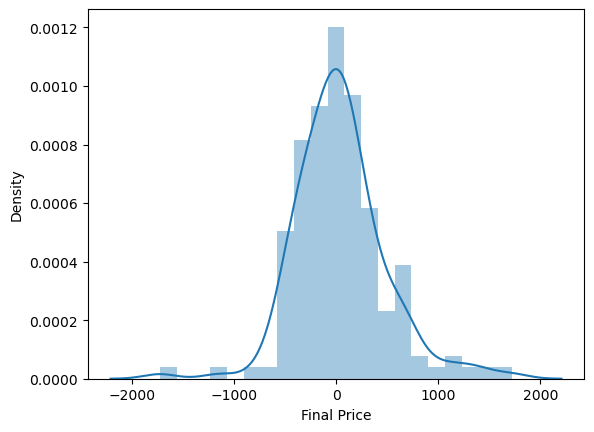

In [129]:
sns.distplot(y_test-y_pred)
plt.show()

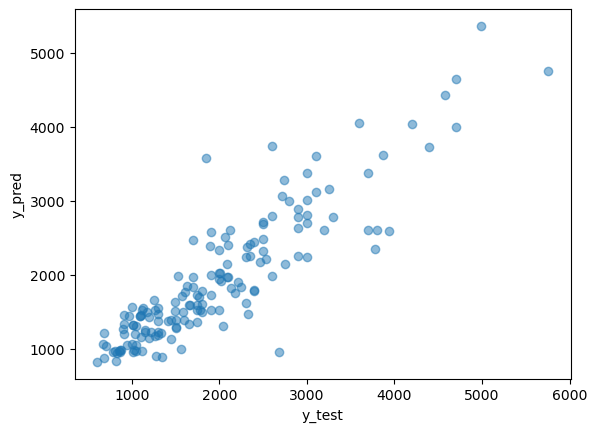

In [130]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [131]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 196972.98358910193


In [132]:
import numpy as np
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 443.8163849939544


In [133]:
import pickle
# open pickle
file = open('laptop_price_prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [134]:
model = open('laptop_price_prediction_model.pkl','rb')
laptop_price_prediction_model = pickle.load(model)

In [138]:
y_test

566    1271.09
536    1410.65
779    2899.99
295    2017.87
46     2599.00
        ...   
70     1299.00
691    1659.24
88     1999.00
171    2389.00
179    1119.01
Name: Final Price, Length: 157, dtype: float64

In [136]:
y_prediction = laptop_price_prediction_model.predict(X_test)

In [142]:
df_comparison = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_comparison['diff'] = (df_comparison['y_test'] - df_comparison['y_pred']).abs()

In [152]:
df_comparison['diff'].mean()

316.1636179724981